### In this notebook we are going to predict the survival of titanic disaster through different machine learning models.

#### Importing all the usefull libraries.

In [1]:
import pandas as pd,numpy as np
import seaborn as sns,matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

## Loading the dataset which we are going to use.

In [2]:
df_train = pd.read_csv('dataset/titanic_train.csv')
df_test = pd.read_csv('dataset/titanic_test.csv')

#### Since the dataset are uploaded sucessfully,its time to explore the data sets.

#### Lets check which are the features available in the data set(Columns names).

In [3]:
print(df_train.columns)
print('-'*75)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
---------------------------------------------------------------------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Now let check the information about the datasets

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### From this we can see there are some missing values in some columns as in Age, Cabine, Embarked.And there are columns which have categorical values.

In [5]:
#Taking the top five values
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Taking the bottom 5 values
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##### From this we can see there are mixed data types present in some columns.
Ticket is a mix of numeric and alphanumeric datatypes and Cabin is alphanumeric.

In [7]:
print(df_train.isnull().sum())
print('-'*75)
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------------------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### From the training datasets null values are in columns:Cabin > Age > Embarked
#### From the testing datasets null values are in : Cabine> Age > Fare

### Explore the columns having the missing valjues

In [8]:
df_train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [9]:
df_train['Cabin'] = df_train['Cabin'].str[0]

In [10]:
df_train.loc[df_train['Cabin'].isna(),'Allotted'] = 0

In [11]:
df_train.loc[df_train['Cabin'].notna(),'Allotted'] = 1

In [12]:
df_train["Age"].mean()

29.69911764705882

In [13]:
df_train["Age"].median()

28.0

In [14]:
## There is a relation between Age and Pclass
df_train.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [15]:
df_train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [16]:
#Now we are assigning the null values of age by the median values with the refrene of Pclass.
df_train.loc[((df_train['Pclass']==1) & (df_train['Age'].isna())),'Age']=37
df_train.loc[(df_train['Pclass']==2) & (df_train['Age'].isna()),'Age'] = 29
df_train.loc[(df_train['Pclass']==3) & (df_train['Age'].isna()),'Age'] = 24

### Dealing with missing values of test datasets

In [17]:
print(df_test['Age'].median())
print(df_test['Age'].mean())
#print(df_test['Age'].mode())

27.0
30.272590361445783


In [18]:
print(df_test.groupby(['Pclass'])['Age'].median())
print('-'*50)
print(df_test.groupby(['Pclass'])['Age'].mean())

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64
--------------------------------------------------
Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


In [19]:
df_test.loc[(df_test['Pclass']==1) & (df_test['Age'].isna()),'Age']= 42
df_test.loc[(df_test['Pclass']==2) & (df_test['Age'].isna()),'Age']= 26
df_test.loc[(df_test['Pclass']==3) & (df_test['Age'].isna()),'Age']= 24


In [20]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
df_test[(df_test['Pclass']==3)&(df_test['Sex']=='male')&(df_test['Embarked']=='S')&(df_test['SibSp']==0)&(df_test['Parch']==0)]['Fare'].median()

7.8958

In [22]:
df_test.loc[(df_test['Fare'].isna(),'Fare')] =7.89

In [23]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [24]:
df_test['Cabin'] = df_test['Cabin'].str[0]
df_test.loc[df_test['Cabin'].isna(),'cabin_allotted'] = 0
df_test.loc[df_test['Cabin'].notna(),'cabin_allotted'] = 1

In [25]:
print(df_train.info())
print('-'*50)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Allotted     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtyp

In [26]:
df_train.loc[df_train['Embarked'].isna(),'Embarked']= 'S'

In [27]:
# We can delete cabin column from both datasets now.
del df_train['Cabin']
del df_test['Cabin']

In [28]:
#Now lets chech the shape of datasets
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


### So our task is to make the prediction of survival for that we can drop some columns from both the datasets which we might not required.




In [29]:
del df_train['Ticket']
del df_train['Name']

In [30]:
del df_test['Ticket']
del df_test['Name']

In [31]:
print(df_train.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.066409    0.523008   
std     257.353842    0.486592    0.836071   13.244532    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   26.000000    0.000000   
75%     668.500000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare    Allotted  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.228956  
std      0.806057   49.693429    0.420397  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    0.000000  
max      6.000000

#### Analyze the features 


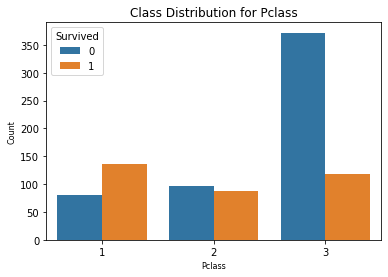

In [32]:
# relation between Pclass and Survived.Which Pclass survived how much
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)
sns.countplot(x='Pclass',hue ='Survived',data= df_train)
plt.title('Class Distribution for Pclass')
plt.ylabel('Count',fontsize=8)
plt.xlabel('Pclass',fontsize=8)
plt.show()

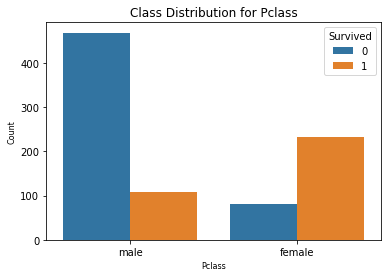

In [33]:
# lets Check how much male and female survived
df_train[['Sex','Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived',ascending=False)
sns.countplot(x='Sex',hue ='Survived',data= df_train)
plt.title('Class Distribution for Pclass')
plt.ylabel('Count',fontsize=8)
plt.xlabel('Pclass',fontsize=8)
plt.show()

In [34]:
# Lets check Parch with Survived..
df_train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [35]:
#Survival rate of SibSp...
df_train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Figure size 936x360 with 0 Axes>

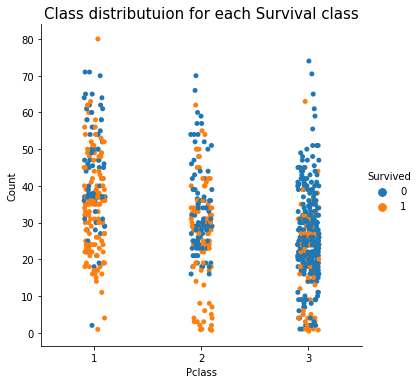

In [36]:
fig= plt.figure(figsize=(13,5))
sns.catplot(x='Pclass',y='Age',hue='Survived',data =df_train)
plt.title("Class distributuion for each Survival class",fontsize=15)
plt.ylabel('Count',fontsize=10)
plt.xlabel('Pclass',fontsize=10)
plt.show()

### Now lets check weather there are some outliers or not

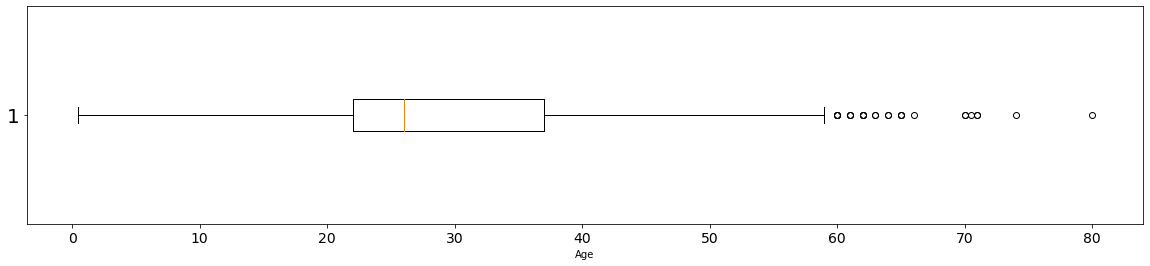

In [37]:
#Boxplot for age
plt.figure(figsize = (20,4))
plt.boxplot(df_train.Age, vert = False)
plt.xlabel('Age')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 20)
plt.show()


C:\Users\Vishwajeet Sangolkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


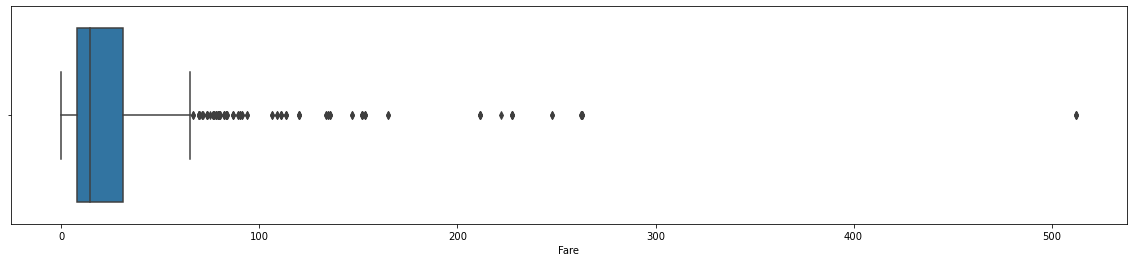

In [38]:
## Boxplot on "Fare"
plt.figure(figsize = (20,4))
sns.boxplot(df_train.Fare)
plt.show()

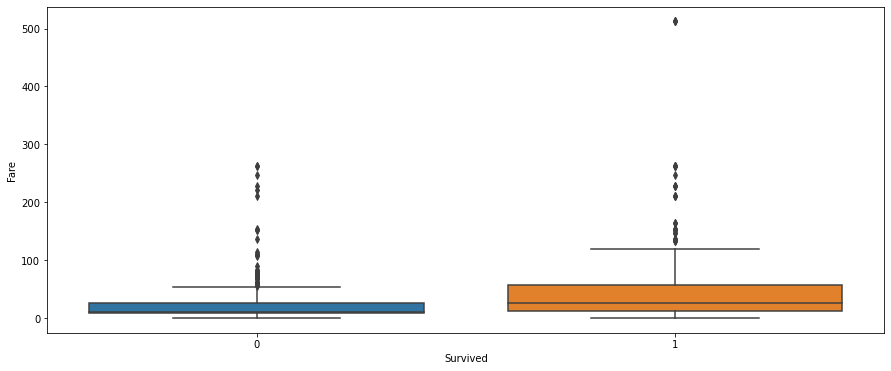

In [39]:
### summary by 'Survived Class'
plt.figure(figsize = (15,6))
sns.boxplot(x = 'Survived',y = 'Fare', data = df_train)
plt.show()

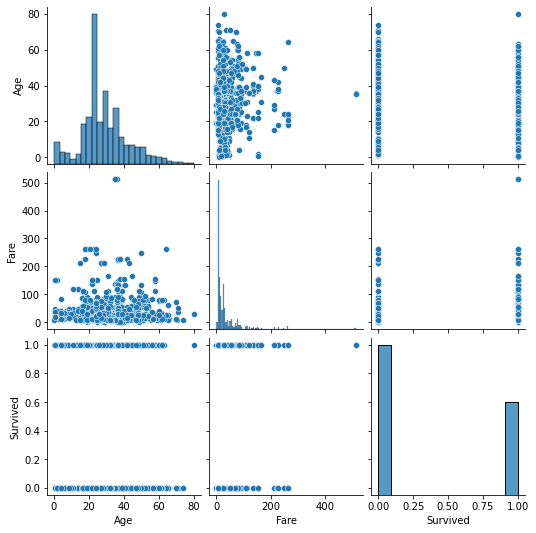

In [40]:
sns.pairplot(df_train[['Age','Fare','Survived']])

In [41]:
## Converting a categorical features,we need to convert for both training and testing data sets
#Training Datasets
df_train['Sex'] = df_train['Sex'].replace({'female':1,'male':0})
df_train['Embarked'] = df_train['Embarked'].replace({'C':2,'Q':1,'S':0})
print(df_train.head())
print(df_train.shape)   


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0  22.0      1      0   7.2500         0   
1            2         1       1    1  38.0      1      0  71.2833         2   
2            3         1       3    1  26.0      0      0   7.9250         0   
3            4         1       1    1  35.0      1      0  53.1000         0   
4            5         0       3    0  35.0      0      0   8.0500         0   

   Allotted  
0       0.0  
1       1.0  
2       0.0  
3       1.0  
4       0.0  
(891, 10)


In [42]:
df_test['Sex'] = df_test['Sex'].replace({'female':1,'male':0})
df_test['Embarked'] = df_test['Embarked'].replace({'C':2,'Q':1,'S':0})
print(df_test.head())
print(df_test.shape)

   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0          892       3    0  34.5      0      0   7.8292         1   
1          893       3    1  47.0      1      0   7.0000         0   
2          894       2    0  62.0      0      0   9.6875         1   
3          895       3    0  27.0      0      0   8.6625         0   
4          896       3    1  22.0      1      1  12.2875         0   

   cabin_allotted  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
(418, 9)


## Now from here onwards we are spliting our datasets


In [43]:
x = df_train.drop(['Survived'],axis=1)
y= df_train['Survived']

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=0)

## Applying the machine learning models

In [45]:
classifiers=[LogisticRegression(),
            KNeighborsClassifier(),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             GaussianNB(),SVC()
            ]

In [46]:
for i in classifiers:
    model = i
    model.fit(x_train,y_train)
    y_predict= model.predict(x_test)
    print('-'*50)
    print(i)
    print('-'*50)
    print('Training Score',model.score(x_train,y_train)*100)
    print("Testing Score",model.score(x_test,y_test)*100)

C:\Users\Vishwajeet Sangolkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Training Score 80.41733547351525
Testing Score 80.59701492537313
--------------------------------------------------
KNeighborsClassifier()
--------------------------------------------------
Training Score 74.79935794542536
Testing Score 61.19402985074627
--------------------------------------------------
DecisionTreeClassifier()
--------------------------------------------------
Training Score 100.0
Testing Score 77.61194029850746
--------------------------------------------------
RandomForestClassifier()
--------------------------------------------------
Training Score 100.0
Testing Score 82.83582089552239
--------------------------------------------------
AdaBoostClassifier()
--------------------------------------------------
Training Score 85.71428571428571
Testing Score 79.47761194029852
--------------------------------------------------
GaussianNB()
----------

In [115]:
### Randomforest giving the highet accuracy on test.
model= RandomForestClassifier(criterion= 'gini', max_depth= 5, n_estimators= 400)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=400)

In [124]:
## Hypertunig the parameters for getting better results
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[100,200,300,400,500],'max_depth':[2,3,4,5],'criterion':['gini','entropy']}
           ]

In [125]:
grid_search = GridSearchCV(estimator=model,
                          scoring='accuracy',param_grid=param_grid,cv=5
                      ,n_jobs=1)

In [98]:
new_model=grid_search.fit(x_train,y_train)

In [100]:
print(new_model.best_score_)

0.8282322580645161


In [101]:
print(new_model.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 400}


In [116]:
print('Training Score',model.score(x_train,y_train)*100)
print("Testing Score",model.score(x_test,y_test)*100)

Training Score 87.47993579454254
Testing Score 82.83582089552239


In [117]:
model.fit(x,y)

RandomForestClassifier(max_depth=5, n_estimators=400)

In [118]:
pred = model.predict(df_test)

In [119]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
submission =  df_test.copy()

In [121]:
submission= submission.reset_index()

In [122]:
#Saving the result of our predition in csv file.

submission['Survived'] = pred
submission = submission[['PassengerId','Survived']]

In [123]:
submission.to_csv('Submission.csv',index = False)